In [1]:
print("gaussian multi variate equation")

gaussian multi variate equation


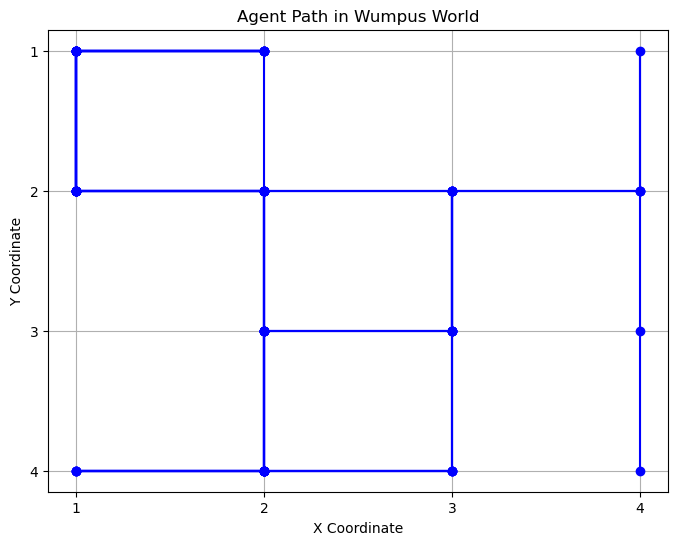

In [2]:
import matplotlib.pyplot as plt

# List of visited coordinates
visited_coordinates = [
    [1, 2], [1, 1], [2, 1], [1, 1], [1, 2], [1, 1], [2, 1], [2, 2], [1, 2], [1, 1], [2, 1], [1, 1], [1, 2],
    [2, 2], [2, 3], [2, 2], [1, 2], [1, 1], [2, 1], [1, 1], [1, 2], [2, 2], [2, 3], [2, 4], [1, 4], [2, 4],
    [2, 3], [2, 2], [3, 2], [3, 3], [3, 4], [2, 4], [1, 4], [2, 4], [2, 3], [3, 3], [3, 2], [2, 2], [1, 2],
    [1, 1], [2, 1], [1, 1], [1, 2], [2, 2], [3, 2], [3, 3], [2, 3], [2, 4], [3, 4], [2, 4], [1, 4], [2, 4],
    [2, 3], [3, 3], [3, 2], [4, 2], [3, 2], [3, 3], [3, 4], [2, 4], [1, 4], [2, 4], [2, 3], [2, 2], [1, 2],
    [1, 1], [2, 1], [1, 1], [1, 2], [2, 2], [2, 3], [2, 4], [3, 4], [3, 3], [3, 2], [4, 2], [4, 1], [4, 2],
    [4, 3], [4, 4]
]

# Separate the x and y coordinates for plotting
x_coords = [coord[0] for coord in visited_coordinates]
y_coords = [coord[1] for coord in visited_coordinates]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
plt.title("Agent Path in Wumpus World")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.xticks(range(1, max(x_coords) + 1))
plt.yticks(range(1, max(y_coords) + 1))
plt.gca().invert_yaxis()  # Invert the y-axis to match the coordinate system
plt.show()

#jsdaf


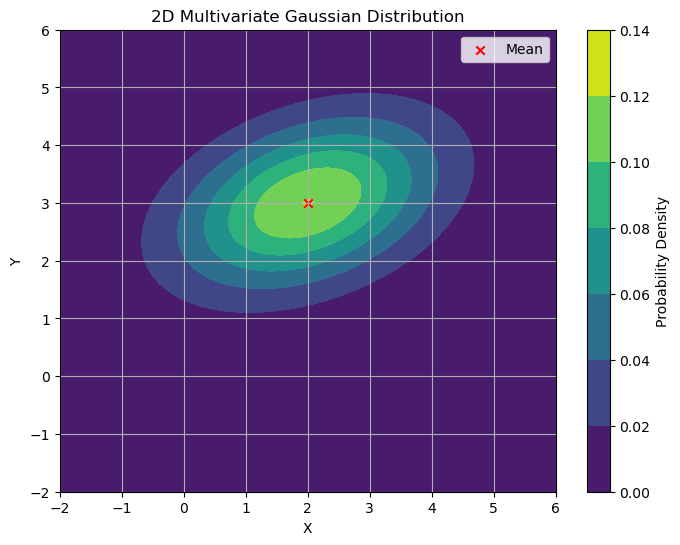

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean vector and covariance matrix of the multivariate Gaussian distribution
mean = np.array([2, 3])
covariance = np.array([[2, 0.5],
                       [0.5, 1]])

# Create a meshgrid of x and y values
x = np.linspace(-2, 6, 100)
y = np.linspace(-2, 6, 100)
X, Y = np.meshgrid(x, y)

# Calculate the probability density function (PDF) for each (x, y) pair
pos = np.dstack((X, Y))
inv_covariance = np.linalg.inv(covariance)
det_covariance = np.linalg.det(covariance)
pdf = (1.0 / (2.0 * np.pi * np.sqrt(det_covariance))) * np.exp(-0.5 * np.sum(np.dot(pos - mean, inv_covariance) * (pos - mean), axis=2))

# Create a contour plot to visualize the multivariate Gaussian distribution
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, pdf, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('2D Multivariate Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(mean[0], mean[1], color='red', label='Mean', marker='x')
plt.legend()
plt.grid(True)
plt.show()


KL:  0.4999997133484283


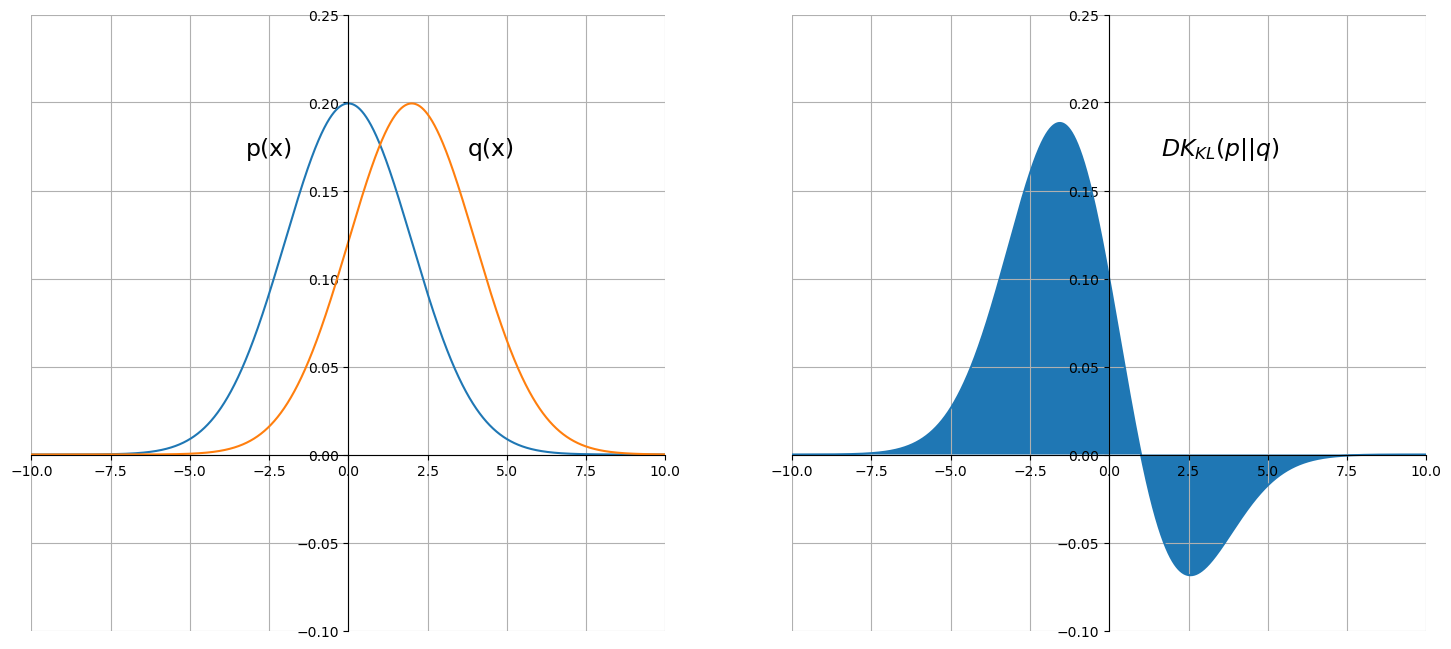

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

from scipy.stats import norm
from scipy.integrate import quad

def p(x):
    return norm.pdf(x, 0, 2)

def q(x):
    return norm.pdf(x, 2, 2)

def KL(x):
    return p(x) * np.log( p(x) / q(x) )

range = np.arange(-10, 10, 0.001)

KL_int, err = quad(KL, -10, 10)
print( 'KL: ', KL_int )

fig = plt.figure(figsize=(18, 8), dpi=100)

#---------- First Plot

ax = fig.add_subplot(1,2,1)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(-2.5, 0.17, 'p(x)', horizontalalignment='center',fontsize=17)
ax.text(4.5, 0.17, 'q(x)', horizontalalignment='center',fontsize=17)

plt.plot(range, p(range))
plt.plot(range, q(range))

#---------- Second Plot

ax = fig.add_subplot(1,2,2)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(3.5, 0.17, r'$DK_{KL}(p||q)$', horizontalalignment='center',fontsize=17)

ax.plot(range, KL(range))

ax.fill_between(range, 0, KL(range))

plt.savefig('KullbackLeibler.png',bbox_inches='tight')
plt.show()

Accuracy : 0.9
[[12  0  0]
 [ 1 11  2]
 [ 0  0  4]]


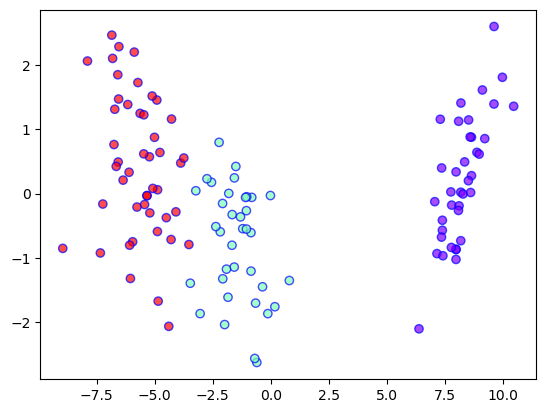

In [5]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
	X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b'
)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9400\2864933195.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


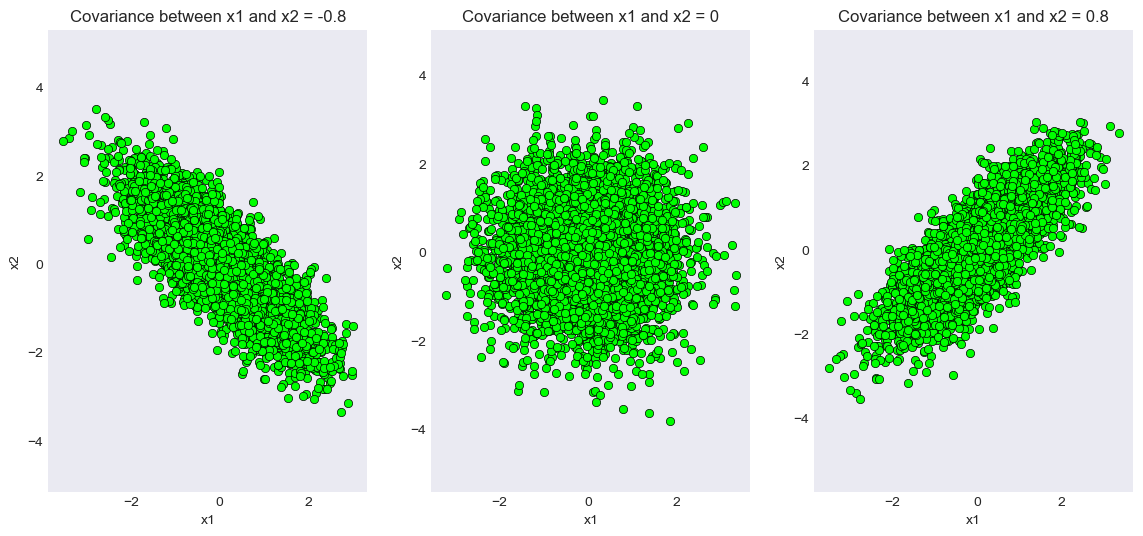

In [6]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino to
# be at (0,0)
mean = np.array([0,0])

# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
	plt.subplot(1,3,idx+1)
	
	# Initializing the covariance matrix
	cov = np.array([[1, val], [val, 1]])
	
	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)
	
	# Generating 5000 samples out of the
	# distribution
	data = distr.rvs(size = 5000)
	
	# Plotting the generated samples
	plt.plot(data[:,0],data[:,1], 'o', c='lime',
			markeredgewidth = 0.5,
			markeredgecolor = 'black')
	plt.title(f'Covariance between x1 and x2 = {val}')
	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.axis('equal')
	
plt.show()
